# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# looking at the data
df.sample(10)

,temperature,gender,heart_rate
88,98.7,M,73.0
27,98.2,F,69.0
102,98.0,F,78.0
80,98.8,F,73.0
103,99.4,F,77.0
92,98.8,F,84.0
12,98.2,M,72.0
105,96.7,M,71.0
15,98.8,F,83.0
21,98.2,M,71.0


### Is the distribution of body temperature normal?

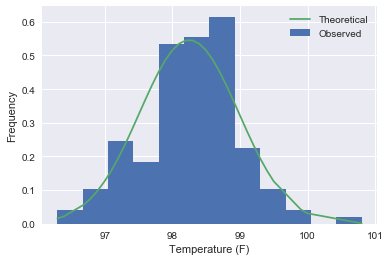

In [3]:
#look at the histogram and CDF of data
sns.set()
temp = sorted(df['temperature'])
fit = stats.norm.pdf(temp, np.mean(temp), np.std(temp))
_ = plt.hist(temp, bins=12, density=True)
_ = plt.plot(temp, fit)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['Theoretical', 'Observed'])
plt.show()

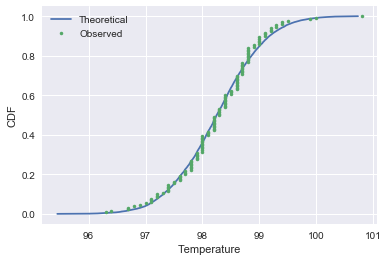

In [4]:
#CDF
#ecdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

#Find mean and std
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

samples = np.random.normal(mu, sigma, 10000)
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.legend(['Theoretical', 'Observed'])
plt.show()

Looking at the histogram and CDF of the data, the body temperature data seems approximately normal.

### Is the sample size large? Are the observations independent?

In [5]:
df.shape

(130, 3)

With 130 records, we can deduce that the sample size is large. We assume that the observations are independent, as the data was recorded on different human subjects. Each observation has different genders and heart rates.

### Is the true population mean really 98.6 degrees F?

We'll perform a bootstrap hypothesis test. Our null hypothesis is that the true population mean does not differ from our observational sample mean, 98.6 degrees F. 

Because we will be doing *two-tailed* hypothesis testing, any p-value less than **0.25** will lead to a conclusion of statistically significant

In [6]:
#draw bs replicates func
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty([size])
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [7]:
temp = df['temperature']
translated_temp = temp - np.mean(temp) + 98.6
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(temp)) / 10000
print('p = ', p)

p =  0.0


Since we have such a low p-value, that means that we can reject our null hypothesis. The true population mean does differ from 98.6 degrees F. We can try using either a one sample Z test or a T test. 

In [8]:
#ztest
from statsmodels.stats.weightstats import ztest
tstat, pval = ztest(temp, ddof = 129)
print(tstat, pval)

134.52205700681014 0.0


In [9]:
#ttest
tstat, pval = stats.ttest_1samp(temp, 98.6)
print(tstat, pval)

-5.4548232923645195 2.4106320415561276e-07


T test here is more appropriate, because although we have a large sample size, we do not know the population variance. We also get a more precise p-value through the T test. In both tests, we get a very small p-value, meaning there is a statistically significant difference between the hypothesized temperature mean and the sample mean.

### Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [10]:
df_sample = df.sample(10)
print(df_sample)
print(np.mean(df_sample['temperature']))

     temperature gender  heart_rate
17          98.2      M        64.0
100         99.0      M        81.0
21          98.2      M        71.0
106         97.0      M        80.0
74          99.0      M        75.0
91         100.0      F        78.0
19          99.4      M        70.0
76          98.0      F        76.0
27          98.2      F        69.0
50          98.9      F        76.0
98.59


In [11]:
#ztest
tstat, pval = ztest(df_sample['temperature'], ddof = 9)
print(tstat, pval)

123.1509399159601 0.0


In [15]:
#ttest
tstat, pval = stats.ttest_1samp(df_sample['temperature'], 98.6)
print(tstat, pval)

-0.037473660589060175 0.9709253837812841


The z test tells us we have a p-value of 0.0, meaning there is a statistically significant difference of the means. However, the t test tells us we have a p-value of 0.769, meaning there is *NOT* statistically significant difference of the means. The sample mean here is 98.55 degrees F, which does not seem like a significant differene from the hypothesized mean of 98.6 degrees F. It is more appropriate to use the t test. The z test can only be performed on a large sample size.

### At what temperature should we consider someone's temperature to be "abnormal"?


To determine this, we need to find the margins of error and a confidence interval for the mean temperature. Whatever body temperature lies outside of these margins/interval can be considered as abnormal. We will use a 95% confidence interval.

In [16]:
#Margin of Error
import math
z = 1.96
mu = np.mean(temp)
sigma = np.std(temp)
n = 130
print('Sample Mean Human Body Temperature: ', mu)

marg_error = z * sigma / math.sqrt(n)
print('Margin of Error: ', marg_error)

conf_inter = [mu-marg_error, mu+marg_error]
print('Confidence Interval: ', conf_inter, 'degrees F')

Sample Mean Human Body Temperature:  98.24923076923078
Margin of Error:  0.125550964802579
Confidence Interval:  [98.12367980442819, 98.37478173403336] degrees F


In [17]:
#Confidence Interval
#creating bootstrap replicates
bs_replicates = draw_bs_reps(temp, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval = ', conf_int, 'degrees F')

95% confidence interval =  [98.12076923 98.37615385] degrees F


**The real population mean human body temperature** is ***98.256 +/- 0.126*** degrees F.

**Normal human body temperature** lies between ***98.123 and 98.375*** degrees F.

Anything outside this interval is abnormal.

### Is there a significant difference between males and females in normal temperature?

We will group the data by gender and use a t test. We need to test if there is a significant difference between the means of the male and female human body temperature.

In [19]:
print('Male mean body temperature: ', np.mean(df.temperature[df.gender == 'M']))
print('Female mean body temperature: ', np.mean(df.temperature[df.gender == 'F']))
#ttest
tstat, pval = stats.ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])
print('Tstat: ', tstat, ' P-value: ', pval)

Male mean body temperature:  98.1046153846154
Female mean body temperature:  98.39384615384613
Tstat:  -2.2854345381656103  P-value:  0.02393188312239561


It's close, but since our p-value of 0.0239 is less than 0.25, we can say that the mean human body temperature between the genders is significantly different. However, because our p-value is so close to our target significance level, we should do another test: **bootstrap hypothesis test**.

In [22]:
#bs hypothesis testing
mean_temp = np.mean(temp)
m = df.temperature[df.gender == 'M']
f = df.temperature[df.gender == 'F']

#shift arrays
shifted_m = m - np.mean(m) + mean_temp
shifted_f = f - np.mean(f) + mean_temp

#bs replicates
bs_replicates_m = draw_bs_reps(shifted_m, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(shifted_f, np.mean, size=10000)

bs_replicates = bs_replicates_m - bs_replicates_f

p = np.sum(bs_replicates >= (np.mean(m) - np.mean(f))) / len(bs_replicates)
print('p-value =', p)

p-value = 0.9883


Here we get a very high p-value, suggesting that there is **no significant difference** between the two genders. 

## Conclusion

120 years ago, Carl Wunderlich reported that the mean human body temperature 37 degrees C or 98.6 degrees F. This number was accepted throughout the world. Using hypothesis and frequentist testing we went forward to determine whether that number still holds today. We took a dataset that included 130 records with temperature, gender, and heartrate from the Journal of the American Medical Association.

Using this dataset, we put it through thorough testing to find the **true mean human body temperature**. 

### Our findings:

The real population mean human body temperature is ***98.256 +/- 0.126 degrees F***.

Normal human body temperature lies between ***98.123 and 98.375 degrees F***.

The mean body temperature is actually around 98.2 degrees F, 0.4 degrees higher than what Wunderlich had found in 1868.